In [1]:
import sys
sys.path.append('../../lib/')
from frustration_traditional import Ising
import numpy as np

In [2]:
model = Ising(20)

In [13]:
T = 1
J = np.array([1, 1])


vals, conf = model.phase_transition(T, J)

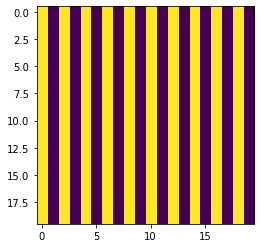

In [14]:
import matplotlib.pyplot as plt

plt.imshow(conf)